<a href="https://colab.research.google.com/github/shramkoartem/automated-trading/blob/main/alpha_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install tabula-py

     |████████████████████████████████| 6.3MB 33.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=e4342d326ed95c2f606ae577eac61aa8e3e3e9af49396e522dc91e801f5675b6
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 11.7MB 262kB/s 


In [3]:
import yfinance as yf
import tabula

import math
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## Getting SP500 Data

In [5]:
import bs4 as bs
import requests
import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,6,1)
data = yf.download(tickers, start=start, end=end)
print(data)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
             Adj Close                         ...    Volume                      
                     A        AAL         AAP  ...      ZBRA       ZION        ZTS
Date                                           ...                                
2020-12-31         NaN        NaN         NaN  ...       NaN        NaN        NaN
2021-01-04  118.459747  15.130000  157.123825  ...  432600.0  1625200.0  1805900.0
2021-01-05  119.428276  15.430000  156.954056  ...  374700.0  1349500.0  1358600.0
2021-01-06  122.703293  15.520000  166.021576  ...  419500.0  3269500.0  2139800.0
2021-01-07  125.968323  15.380000  167.439621  ...  379900.0  2333900.0  1710700.0
...                ...        ...         ...  ...       ...        ...        ...
2021-05-24  133.339996  22.990000  190.649994 

In [28]:
# Calculating returns based on close price

close = data["Adj Close"]
returns = close.pct_change().fillna(0)
# alternative: returns = (close - close.shift(-1)) / close

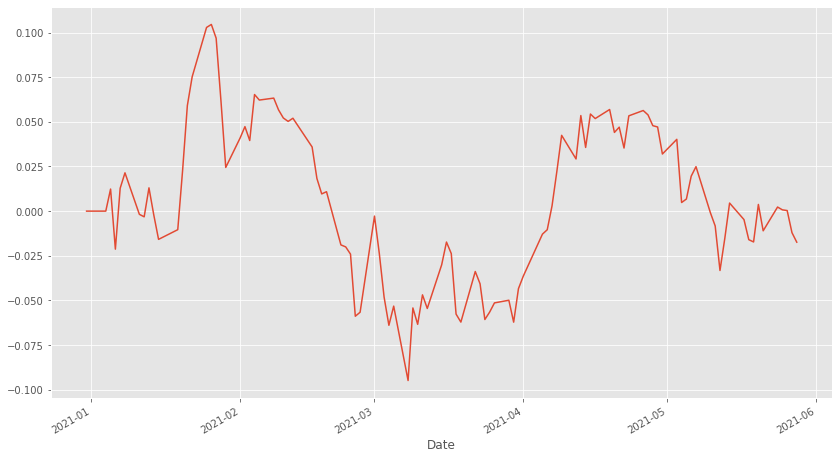

In [29]:
# Apple returns example
returns.AAPL.cumsum().plot()